In [18]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pickle 
from matplotlib.ticker import MaxNLocator
from matplotlib.font_manager import fontManager, FontProperties
from matplotlib.lines import Line2D
from matplotlib.patches import Patch, Rectangle

In [87]:

path = "/home/korau/Downloads/Linux_Biolinum/LinBiolinum_RB.ttf"
fontManager.addfont(path)

palettt = sns.color_palette('husl', n_colors=4)

prop = FontProperties(fname=path)
legend_elements = [Rectangle([0,0], height = 0.5, width= 0.5, color=palettt[0], label='Conformal'),
                    Rectangle([0,0], height = 0.5, width= 0.5, color=palettt[1], label='Sym. Dir.'),
                    Rectangle([0,0], height = 0.5, width= 0.5, color=palettt[2], label='Harmonic'),
                    Rectangle([0,0], height = 0.5, width= 0.5, color=palettt[3], label='ARAP'),                   
#                    Line2D([0], [0], color=palettt[1], lw=4, label='Sym. Dir.'),
#                    Line2D([0], [0], color=palettt[2], lw=4, label='Harmonic.'),
#                    Line2D([0], [0], color=palettt[3], lw=4, label='ARAP'),
                   Line2D([0], [0], lw=2, color='k', label='Energy',
                          markerfacecolor='k', markersize=10),
                   Line2D([0], [0], dashes=[1,1], lw=2, color='k', label='Time',
                          markerfacecolor='k', markersize=10),
                  ]

In [91]:
def sns_viz(data, mesh, palet = "husl", style="white"):
    sns.set(font=prop.get_name(), style=style, rc={'figure.figsize':(5,2)})
    #plt.figure(figsize=(6.5, 2))
#     new_list = range(math.floor(min(data['Iteration'])), math.ceil(data['Iteration'])+1)
#     plt.xticks(new_list)
    palet_used = sns.color_palette(palet, n_colors=4)
    fig, ax = plt.subplots()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    l1 = sns.lineplot(data=data, x="Iteration", y="Energy", hue='Method', palette=palet_used, alpha=1, legend=False)
    s1 = sns.scatterplot(data=data, x="Iteration", y="Energy", marker="o", s=50, 
                         hue='Method', palette=palet_used, legend=False)
    l1.set(xlabel=None, ylabel=None)
    s1.set_xlabel('Iteration')
    s1.set_ylabel('Relative Energy')
    ax2 = plt.twinx()
    s2 = sns.scatterplot(data=data, ax=ax2, x="Iteration", y="Time", marker="P", s=50, 
                         hue='Method', palette=palet_used, legend=False)
    l2 = sns.lineplot(data=data, x="Iteration", y="Time", hue='Method', palette=palet_used, 
                      linestyle='--', alpha=0.7, legend=False)
    l2.set(xlabel=None, ylabel=None)
    s2.set(xlabel=None)
    s2.set_ylabel('Relative Time')
    ax.legend(handles=legend_elements, loc='center left', prop={'size': 9}, framealpha=0.4, alpha=0.5)

    #g.set_title(f"{mesh}")
    #legend = ax.legend()
    #handles, labels = ax.get_legend_handles_labels()
    #ax.legend(handles=handles[1:], labels=labels[1:])  
    sep = '.'
    stripped = mesh.split(sep, 1)[0]
    plt.savefig(f"{stripped}.svg", format='svg')
    plt.show()

In [131]:
def sns_his(data,method, palet = "husl", style="white"):
    sns.set(font=prop.get_name(), style=style, rc={'figure.figsize':(3,2)})
    palet_used = sns.color_palette(palet, n_colors=4)
    l1 = sns.histplot(data=data, x='Energy Ratio : Intrinsic / Extrinsic', multiple='layer', bins=25)
    plt.ylabel('')
    plt.xlabel('')
    plt.savefig(f"{method}_hist.svg", format='svg')
    plt.show()

In [93]:
data1 = {'Energy': [0.000193335, 0.000193325, 0.000193324, 0.000193324, 0.000193324, 0.000193324,
                   0.000195584, 0.000195584, 0.000195584, 0.000195584, 0.000195584, 0.000195584, 
                   0.000195587, 0.000195587, 
                   0.000195587],
        'Iteration': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
        'Type': ['Global', 'Local', 'Local', 'Local', 'Local', 'Local', 
                   'Global','Local', 'Local', 'Local', 'Local', 'Local', 
                   'Global', 'Local', 
                   'Global']}
df = pd.DataFrame(data1)

In [94]:
ext_energies= {}

In [117]:
def looop(directory):
    all_energies = []
    all_iterations = []
    all_types = []
    all_methods = []
    all_times = []    
    for folder in os.listdir(directory):

        # Check if the item is a folder
        mesh_folder = os.path.join(directory, folder)
        #print(mesh_folder)
        current_mesh_res = {
            'ARAP' : [0,0,0,0],
            'Conformal' : [0,0,0,0],
            'Harmonic' : [0,0,0,0],
            'Sym. Dir.' : [0,0,0,0]
        }
        skip = False
        available_methods = []
        for item in os.listdir(mesh_folder):
            log_path = os.path.join(mesh_folder, item)
            if os.path.isdir(log_path):
                continue
            if os.path.getsize(log_path) == 0:
                continue
            with open(log_path, 'r') as file:
                if skip:
                    continue
                # Create a CSV reader object
                reader = csv.reader(file, delimiter=',')
                #print(file)
                first_row = next(reader)
                method_name = first_row[1]
                if(method_name == 'arap'):
                    method_name = 'ARAP'
                    available_methods.append(method_name)
                if(method_name == 'asap'):
                    method_name ='Conformal'
                    available_methods.append(method_name)                    
                if(method_name == 'dirichlet'):
                    method_name = 'Harmonic'
                    available_methods.append(method_name)                    
                if(method_name == 'symdirichlet'):
                    method_name = 'Sym. Dir.'
                    available_methods.append(method_name)
                    
                opt_times = []
                flip_times = []                   
                name_m = first_row[0]

                #print((current_mesh_res[method_name])[0])
                    
                # Iterate over each row in the log file
                for row in reader:
                    #print(row[0])
                    if row[0] == 'energies':
                        energies_str = row[1:]
                        energies = [float(i) for i in energies_str]
                        max_energy = max(energies)
                        start_energy = energies[0]
                        ext_energies[name_m+method_name] = start_energy
                        end_energy = energies[-1]
                        if(end_energy/start_energy>1):
#                                 conformal_problem_meshes.append(name_m)
#                             if(method_name == 'Harmonic'):
#                                 harmonic_problem_meshes.append(name_m)    
#                             if(method_name == 'Sym. Dir.'):
#                                 symdir_problem_meshes.append(name_m)
                            #print(end_energy/start_energy)
                            #print(method_name)
                            skip = True
                            break
                        (current_mesh_res[method_name])[0] = end_energy/start_energy
                        #print((current_mesh_res[method_name])[0])

                        energies_normalized = [i/max_energy for i in energies]
                        iterations = [i for i,_ in enumerate(energies)]
                        types = ['Position Opt.' if i%2==0 else 'Flipping' for i in iterations]
                        iterations_half = [i/2 for i in iterations]
                        methods = [method_name for i in iterations]
                        all_energies += energies_normalized[:5]
                        all_iterations += iterations_half[:5]
                        all_types += types[:5]
                        all_methods += methods[:5]

                    if row[0] == 'opt_durations':
                        opt_times = [max(float(i),1) for i in row[1:]]
                        #print('opt_times')
                        #print(opt_times)
                    if row[0] == 'flip_durations':
                        flip_times = [max(float(i),1) for i in row[1:]]
                        #print('flip times')
                        #print(flip_times)
                    if row[0] == 'total_duration_normal':
                        # if(float(row[1])==0):
                        #     skip = True
                        current_mesh_res[method_name][1] = float(row[1])
                    if row[0] == 'total_duration_iparam':
                        current_mesh_res[method_name][2] += float(row[1])
                        if(float(row[1])==0 and method_name == 'Harmonic'):
                            tak.append(name_m)

                    if row[0] == 'init_time':
                        current_mesh_res[method_name][2] += float(row[1])

                    if row[0] == 'subdivision_time':
                        current_mesh_res[method_name][3] += float(row[1])                    
                    if row[0] == 'mesh_construction_time':
                        current_mesh_res[method_name][3] += float(row[1])
#                     if row[0] == 'ext_vertices' and method_name == 'Harmonic':
#                         tak.append(float(row[1]))
                    # if row[0] == 'ext_vertices':
                    #     current_mesh_res[method_name][2] = float(row[1])
                if skip:
                    #print("skipped: " + name_m )
                    continue
                first_time = opt_times[0]
                times = [opt_times[i//2] / first_time if i%2==0 else flip_times[i//2] / first_time for i in iterations]
                times = np.cumsum(times).tolist()
                all_times += times[:5]
                #print('times')
                #print(times)
                #(current_mesh_res[method_name])[1] = times[-1]

        if skip or len(available_methods)!=4:
            banned_meshes.append(folder)
            continue
        #print((current_mesh_res['Conformal'])[1])
        #print(all_methods)
        energy_decs_arap.append((current_mesh_res['ARAP'])[0])
        energy_decs_asap.append((current_mesh_res['Conformal'])[0])
        energy_decs_dir.append((current_mesh_res['Harmonic'])[0])
        energy_decs_symdir.append((current_mesh_res['Sym. Dir.'])[0])
        
#         times_arap.append((current_mesh_res['ARAP'])[2]/(current_mesh_res['ARAP'])[1])
#         times_asap.append((current_mesh_res['Conformal'])[2]/(current_mesh_res['Conformal'])[1])
#         times_dir.append((current_mesh_res['Harmonic'])[2]/(current_mesh_res['Harmonic'])[1])
#         times_symdir.append((current_mesh_res['Sym. Dir.'])[2]/(current_mesh_res['Sym. Dir.'])[1]) 
        arap_res.append([name_m,(current_mesh_res['ARAP'])[0], (current_mesh_res['ARAP'])[1], (current_mesh_res['ARAP'])[2],current_mesh_res['ARAP'][3]])  
        dir_res.append([name_m,(current_mesh_res['Harmonic'])[0],(current_mesh_res['Harmonic'])[1],(current_mesh_res['Harmonic'])[2],current_mesh_res['Harmonic'][3]])  
        asap_res.append([name_m,(current_mesh_res['Conformal'])[0],(current_mesh_res['Conformal'])[1],(current_mesh_res['Conformal'])[2],current_mesh_res['Conformal'][3]])  
        symdir_res.append([name_m,(current_mesh_res['Sym. Dir.'])[0], (current_mesh_res['Sym. Dir.'])[1],(current_mesh_res['Sym. Dir.'])[2],current_mesh_res['Sym. Dir.'][3]]) 
#         print((current_mesh_res['ARAP'])[1])
#         data_curr = { 'Energy' : all_energies,
#                           'Iteration' : all_iterations,
#                           'Type' : all_types,
#                           'Method': all_methods,
#                           'Time': all_times
#                         }
#         df = pd.DataFrame(data_curr)
#         if(name_m=='106620.off'):
#             sns_viz(df, name_m)
#         if(name_m=='222747.off'):
#             sns_viz(df, name_m)

In [102]:
def print_metrics(hoppo):
    print("mean: ")
    print(np.nanmean(hoppo))
    print("median: ")
    print(np.nanmedian(hoppo))
    print("5% quantile: ")
    print(np.nanquantile(hoppo, 0.05))
    print("95% quantile: ")
    print(np.nanquantile(hoppo, 0.95))

mean: 
0.8193038926373454
median: 
0.9323145195496698
5% quantile: 
0.1361610377525258
95% quantile: 
0.998735578270072
746
10


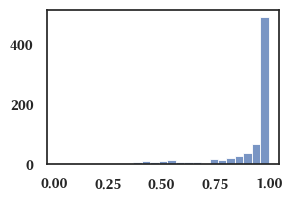

In [135]:
# Specify the directory path
#directory = '/home/korau/meshes/output'
#directory = '../output'
# Iterate over the folders in the directory
banned_meshes = []
harmonic_problem_meshes = []
conformal_problem_meshes = []
symdir_problem_meshes = []
arap_res = []
dir_res = []
symdir_res = []
asap_res = []


tak = []

res = []
energy_decs_asap = []
energy_decs_arap = []
energy_decs_dir = []
energy_decs_symdir = []
times_asap = []
times_arap = []
times_dir = []
times_symdir = []
problem_meshes = []
looop('/home/korau/iparam_res/output')
#looop('/home/korau/meshes/output_cutted')
to_print = energy_decs_arap
print_metrics(to_print)
print(len(to_print))
print(len(banned_meshes))
#banned_meshes
# print(symdir_problem_meshes)
# file = open('symdir_problem.txt','w')
# for item in symdir_problem_meshes:
# 	file.write(item+"\n")
# file.close()
# file = open('conformal_problem.txt','w')
# for item in conformal_problem_meshes:
# 	file.write(item+"\n")
# file.close()
arap_res = sorted(arap_res, key=lambda x: x[2])
dir_res = sorted(dir_res, key=lambda x: x[2])
symdir_res = sorted(symdir_res, key=lambda x: x[4])
asap_res = sorted(asap_res, key=lambda x: x[1])

zaa = [[name,en,time_ext/1000,time_iparam/1000,time_cs/1000] for [name,en,time_ext,time_iparam,time_cs] in arap_res if en>0.9]
lenn = len(energy_decs_symdir)
# print(zaa)
dataa = {
    'Energy Ratio : Intrinsic / Extrinsic' : energy_decs_dir,
    'Method' : ['Conformal'] * lenn 
} 
sns_his(dataa, 'dirichlet')
# print(ext_energies)
# np.save('arap_results', arap_res)
# np.save('harmonic_results', dir_res)
# np.save('conformal_results', asap_res)
# np.save('symdir_results', symdir_res)
# print(dir_res)

In [75]:
with open('ext_energies.pkl', 'wb') as f:
    pickle.dump(ext_energies, f)

In [9]:
def looop_idt(directory, directory_ext):
    all_energies = []
    all_iterations = []
    all_types = []
    all_methods = []
    all_times = []
    for folder in os.listdir(directory):
        if folder in banned_meshes:
            continue
        # Check if the item is a folder
        mesh_folder = os.path.join(directory, folder)
        #print(mesh_folder)
        current_mesh_res = {
            'ARAP' : [0,0,0],
            'Conformal' : [0,0,0],
            'Harmonic' : [0,0,0],
            'Sym. Dir.' : [0,0,0]
        }
        skip = False
        available_methods = []
        ext_folder = os.path.join(directory_ext, folder)
        #print(ext_folder)
        for item in os.listdir(mesh_folder):
            log_path = os.path.join(mesh_folder, item)
            log_path_ext = os.path.join(ext_folder, item)
            if os.path.isdir(log_path):
                continue
            if os.path.getsize(log_path) == 0:
                continue
            with open(log_path, 'r') as file:
                if skip:
                    continue
                # Create a CSV reader object
                reader = csv.reader(file, delimiter=',')
                #print(file)
                first_row = next(reader)
                method_name = first_row[1]
                if(method_name == 'arap'):
                    method_name = 'ARAP'
                    available_methods.append(method_name)
                if(method_name == 'asap'):
                    method_name ='Conformal'                  
                    continue;
                if(method_name == 'dirichlet'):
                    method_name = 'Harmonic'
                    continue
                if(method_name == 'symdirichlet'):
                    method_name = 'Sym. Dir.'
                    available_methods.append(method_name)
                                  
                name_m = first_row[0]

                #print((current_mesh_res[method_name])[0])
                    
                # Iterate over each row in the log file
                for row in reader:
                    #print(row[0])
                    if row[0] == 'energies':
                        energies_str = row[1:]
                        energies = [float(i) for i in energies_str]
                        max_energy = max(energies)
                        start_energy = energies[0]
                        end_energy = energies[-1]
                        if(end_energy/start_energy>1 or end_energy==float('inf') or start_energy==float('inf') ):
                            skip = True
                            #print(end_energy/start_energy)
                            break
                        (current_mesh_res[method_name])[1] = start_energy
                        (current_mesh_res[method_name])[2] = end_energy
            with open(log_path_ext, 'r') as file:
                if skip:
                    continue
                # Create a CSV reader object
                reader = csv.reader(file, delimiter=',')
                #print(file)
                first_row = next(reader)
                method_name = first_row[1]
                if(method_name == 'arap'):
                    method_name = 'ARAP'
                    available_methods.append(method_name)
                if(method_name == 'asap'):
                    method_name ='Conformal'                  
                    continue;
                if(method_name == 'dirichlet'):
                    method_name = 'Harmonic'
                    continue
                if(method_name == 'symdirichlet'):
                    method_name = 'Sym. Dir.'
                    available_methods.append(method_name)
                                  
                name_m = first_row[0]

                #print((current_mesh_res[method_name])[0])
                    
                # Iterate over each row in the log file
                for row in reader:
                    #print(row[0])
                    if row[0] == 'energies':
                        energies_str = row[1:]
                        energies = [float(i) for i in energies_str]
                        max_energy = max(energies)
                        start_energy = energies[0]
                        end_energy = energies[-1]
                        if(end_energy/start_energy>1):
                            skip = True
                            #print(end_energy/start_energy)
                            break
                        (current_mesh_res[method_name])[0] = start_energy                        
                if skip:
                    continue
        if skip or len(available_methods)!=4:
            print("skipped: " + name_m )
            
            continue
        #print((current_mesh_res['Conformal'])[1])
        #print(all_methods)
        energy_ext_start_arap.append((current_mesh_res['ARAP'])[0])        
        energy_idt_start_arap.append((current_mesh_res['ARAP'])[1])
        energy_idt_end_arap.append((current_mesh_res['ARAP'])[2])
#         energy_idt_start_asap.append((current_mesh_res['Conformal'])[0])
#         energy_idt_end_asap.append((current_mesh_res['Conformal'])[1])
        energy_ext_start_symdir.append((current_mesh_res['Sym. Dir.'])[0])        
        energy_idt_start_symdir.append((current_mesh_res['Sym. Dir.'])[1])
        energy_idt_end_symdir.append((current_mesh_res['Sym. Dir.'])[2])
#         energy_idt_start_dir.append((current_mesh_res['Harmonic'])[0])
#         energy_idt_end_dir.append((current_mesh_res['Harmonic'])[1])        
  
        #print((current_mesh_res['ARAP'])[1])
    #     data_curr = { 'Energy' : all_energies,
    #                       'Iteration' : all_iterations,
    #                       'Type' : all_types,
    #                       'Method': all_methods,
    #                       'Time': all_times
    #                     }
    #     df = pd.DataFrame(data_curr)
    #     if(name_m=='106620.off'):
    #         sns_viz(df, name_m)
    #     if(name_m=='222747.off'):
    #         sns_viz(df, name_m)

In [12]:
# energy_idt_start_asap = []
# energy_idt_end_asap = []
energy_ext_start_arap = []
energy_idt_start_arap = []
energy_idt_end_arap = []
# energy_idt_start_dir = []
# energy_idt_end_dir = []
energy_ext_start_symdir = []
energy_idt_start_symdir = []
energy_idt_end_symdir = []

looop_idt('/home/korau/lasto_outputdel','/home/korau/lasto_output')

#looop_idt('/home/korau/meshes/output_cutted_delaunay', '/home/korau/meshes/output_cutted')
energy_dec_nofurtherflip_arap = [i / j for i, j in zip(energy_idt_start_arap, energy_ext_start_arap)]
energy_dec_yesfurtherflip_arap = [i / j for i, j in zip(energy_idt_end_arap, energy_ext_start_arap)]

energy_dec_nofurtherflip_symdir = [i / j for i, j in zip(energy_idt_start_symdir, energy_ext_start_symdir)]
energy_dec_yesfurtherflip_symdir = [i / j for i, j in zip(energy_idt_end_symdir, energy_ext_start_symdir)]

print_metrics((energy_dec_yesfurtherflip_symdir))
#energy_dec_yesfurtherflip_symdir.sort()
#print(energy_dec_yesfurtherflip_symdir)

mean: 
12355628.89890695
median: 
1.0001168029173042
5% quantile: 
0.9976746714776914
95% quantile: 
2.446288289598878


In [129]:
def looop_prio(directory_noprio, directory_prio):
    all_energies = []
    all_iterations = []
    all_types = []
    all_methods = []
    all_times = []
    for folder in os.listdir(directory_noprio):
        if folder in banned_meshes:
            continue
        # Check if the item is a folder
        mesh_folder = os.path.join(directory_noprio, folder)
        #print(mesh_folder)
        current_mesh_res = {
            'ARAP' : [0,0],
            'Conformal' : [0,0],
            'Harmonic' : [0,0],
            'Sym. Dir.' : [0,0]
        }
        skip = False
        available_methods = []
        prio_folder = os.path.join(directory_prio, folder)
#         print(prio_folder)
        for item in os.listdir(mesh_folder):
            log_path = os.path.join(mesh_folder, item)
            log_path_prio = os.path.join(prio_folder, item)
#             print(os.path.getsize(log_path_prio))
            if os.path.isdir(log_path) or (not os.path.exists(log_path_prio)):
                continue
            if os.path.getsize(log_path) == 0 or os.path.getsize(log_path_prio) == 0:
                continue
            with open(log_path, 'r') as file:
                if skip:
                    continue
                # Create a CSV reader object
                reader = csv.reader(file, delimiter=',')
                #print(file)
                first_row = next(reader)
                method_name = first_row[1]
                if(method_name == 'arap'):
                    method_name = 'ARAP'
                    available_methods.append(method_name)
                if(method_name == 'asap'):
                    method_name ='Conformal'                  
                    available_methods.append(method_name)
                if(method_name == 'dirichlet'):
                    method_name = 'Harmonic'
                    available_methods.append(method_name)
                if(method_name == 'symdirichlet'):
                    method_name = 'Sym. Dir.'
                    available_methods.append(method_name)
                                  
                name_m = first_row[0]

                #print((current_mesh_res[method_name])[0])
                    
                # Iterate over each row in the log file
                for row in reader:
                    #print(row[0])
                    if row[0] == 'energies':
                        energies_str = row[1:]
                        energies = [float(i) for i in energies_str]
                        max_energy = max(energies)
                        start_energy = energies[0]
                        end_energy = energies[-1]
                        if(end_energy/start_energy>1 or end_energy==float('inf') or start_energy==float('inf') ):
                            skip = True
                            #print(end_energy/start_energy)
                            break
                        (current_mesh_res[method_name])[0] = end_energy
            with open(log_path_prio, 'r') as file:
                if skip:
                    continue
                # Create a CSV reader object
                reader = csv.reader(file, delimiter=',')
                #print(file)
                first_row = next(reader)
                method_name = first_row[1]
                if(method_name == 'arap'):
                    method_name = 'ARAP'
                    available_methods.append(method_name)
                if(method_name == 'asap'):
                    method_name ='Conformal'                  
                    available_methods.append(method_name)
                if(method_name == 'dirichlet'):
                    method_name = 'Harmonic'
                    available_methods.append(method_name)
                if(method_name == 'symdirichlet'):
                    method_name = 'Sym. Dir.'
                    available_methods.append(method_name)
                                  
                name_m = first_row[0]

                #print((current_mesh_res[method_name])[0])
                    
                # Iterate over each row in the log file
                for row in reader:
                    #print(row[0])
                    if row[0] == 'energies':
                        energies_str = row[1:]
                        energies = [float(i) for i in energies_str]
                        max_energy = max(energies)
                        start_energy = energies[0]
                        end_energy = energies[-1]
                        if(end_energy/start_energy>1):
                            skip = True
                            #print(end_energy/start_energy)
                            break
                        (current_mesh_res[method_name])[1] = end_energy                        
                if skip:
                    print("skipped: " + name_m )
                    continue
        if skip or len(available_methods)!=8:
            continue
        #print((current_mesh_res['Conformal'])[1])
        #print(all_methods)
        noprio_end_energies_arap.append((current_mesh_res['ARAP'])[0])        
        noprio_end_energies_asap.append((current_mesh_res['Conformal'])[0])        
        noprio_end_energies_dir.append((current_mesh_res['Harmonic'])[0])        
        noprio_end_energies_symdir.append((current_mesh_res['Sym. Dir.'])[0])        
        prio_end_energies_arap.append((current_mesh_res['ARAP'])[1])        
        prio_end_energies_asap.append((current_mesh_res['Conformal'])[1])        
        prio_end_energies_dir.append((current_mesh_res['Harmonic'])[1])        
        prio_end_energies_symdir.append((current_mesh_res['Sym. Dir.'])[1])        
        
        #print((current_mesh_res['ARAP'])[1])
    #     data_curr = { 'Energy' : all_energies,
    #                       'Iteration' : all_iterations,
    #                       'Type' : all_types,
    #                       'Method': all_methods,
    #                       'Time': all_times
    #                     }
    #     df = pd.DataFrame(data_curr)
    #     if(name_m=='106620.off'):
    #         sns_viz(df, name_m)
    #     if(name_m=='222747.off'):
    #         sns_viz(df, name_m)

In [591]:
noprio_end_energies_arap = []
prio_end_energies_arap = []
noprio_end_energies_asap = []
prio_end_energies_asap = []
noprio_end_energies_dir = []
prio_end_energies_dir = []
noprio_end_energies_symdir = []
prio_end_energies_symdir = []

looop_prio('/home/korau/output_prio', '/home/korau/output_noprio')
divo_arap = [i / j for i, j in zip(noprio_end_energies_arap, prio_end_energies_arap)]
divo_asap = [i / j for i, j in zip(noprio_end_energies_asap, prio_end_energies_asap)]
divo_dir = [i / j for i, j in zip(noprio_end_energies_dir, prio_end_energies_dir)]
divo_symdir = [i / j for i, j in zip(noprio_end_energies_symdir, prio_end_energies_symdir)]
print_metrics(divo_arap)
print(len(noprio_end_energies_arap))

skipped: 375244.obj_cutted.off
skipped: 37274.obj_cutted.off
skipped: 735907.obj_cutted.off
skipped: 375241.obj_cutted.off
skipped: 63871.obj_cutted.off
skipped: 71307.obj_cutted.off
skipped: 129915.obj_cutted.off
skipped: 849727.obj_cutted.off
skipped: 39636.obj_cutted.off
skipped: 331045.obj_cutted.off
skipped: 1275115.obj_cutted.off
skipped: 84022.obj_cutted.off
skipped: 591214.obj_cutted.off
skipped: 107390.obj_cutted.off
skipped: 70834.obj_cutted.off
skipped: 124373.obj_cutted.off
skipped: 849720.obj_cutted.off
skipped: 237623.obj_cutted.off
skipped: 65615.obj_cutted.off
skipped: 71041.obj_cutted.off
skipped: 73085.obj_cutted.off
skipped: 112965.obj_cutted.off
skipped: 500092.obj_cutted.off
skipped: 762606.obj_cutted.off
skipped: 40601.obj_cutted.off
skipped: 314438.obj_cutted.off
skipped: 105688.obj_cutted.off
skipped: 929559.obj_cutted.off
skipped: 849726.obj_cutted.off
skipped: 73086.obj_cutted.off
skipped: 70833.obj_cutted.off
skipped: 472001.obj_cutted.off
skipped: 113221.obj

In [ ]:
def looop_prio(directory_gran):
    all_energies = []
    all_iterations = []
    all_types = []
    all_methods = []
    all_times = []
    for folder in os.listdir(directory_gran):
        if folder in banned_meshes:
            continue
        # Check if the item is a folder
        mesh_folder = os.path.join(directory_gran, folder)
        #print(mesh_folder)
        current_mesh_res = {
            'ARAP' : [0,0],
            'Sym. Dir.' : [0,0]
        }
        skip = False
        available_methods = []
        for item in os.listdir(mesh_folder):
            log_path = os.path.join(mesh_folder, item)
#             print(os.path.getsize(log_path_prio))
            if os.path.isdir(log_path):
                continue
            if os.path.getsize(log_path) == 0:
                continue
            with open(log_path, 'r') as file:
                if skip:
                    continue
                # Create a CSV reader object
                reader = csv.reader(file, delimiter=',')
                #print(file)
                first_row = next(reader)
                method_name = first_row[1]
                if(method_name == 'arap'):
                    method_name = 'ARAP'
                    available_methods.append(method_name)
                if(method_name == 'asap'):
                    method_name ='Conformal'                  
                    available_methods.append(method_name)
                if(method_name == 'dirichlet'):
                    method_name = 'Harmonic'
                    available_methods.append(method_name)
                if(method_name == 'symdirichlet'):
                    method_name = 'Sym. Dir.'
                    available_methods.append(method_name)
                                  
                name_m = first_row[0]

                #print((current_mesh_res[method_name])[0])
                    
                # Iterate over each row in the log file
                for row in reader:
                    #print(row[0])
                    if row[0] == 'energies':
                        energies_str = row[1:]
                        energies = [float(i) for i in energies_str]
                        max_energy = max(energies)
                        start_energy = energies[0]
                        end_energy = energies[-1]
                        if(end_energy/start_energy>1 or end_energy==float('inf') or start_energy==float('inf') ):
                            skip = True
                            #print(end_energy/start_energy)
                            break
                        (current_mesh_res[method_name])[0] = end_energy
            
        if skip or len(available_methods)!=8:
            continue
        #print((current_mesh_res['Conformal'])[1])
        #print(all_methods)
        noprio_end_energies_arap.append((current_mesh_res['ARAP'])[0])        
        noprio_end_energies_asap.append((current_mesh_res['Conformal'])[0])        
        noprio_end_energies_dir.append((current_mesh_res['Harmonic'])[0])        
        noprio_end_energies_symdir.append((current_mesh_res['Sym. Dir.'])[0])        
        prio_end_energies_arap.append((current_mesh_res['ARAP'])[1])        
        prio_end_energies_asap.append((current_mesh_res['Conformal'])[1])        
        prio_end_energies_dir.append((current_mesh_res['Harmonic'])[1])        
        prio_end_energies_symdir.append((current_mesh_res['Sym. Dir.'])[1])        
        
        #print((current_mesh_res['ARAP'])[1])
    #     data_curr = { 'Energy' : all_energies,
    #                       'Iteration' : all_iterations,
    #                       'Type' : all_types,
    #                       'Method': all_methods,
    #                       'Time': all_times
    #                     }
    #     df = pd.DataFrame(data_curr)
    #     if(name_m=='106620.off'):
    #         sns_viz(df, name_m)
    #     if(name_m=='222747.off'):
    #         sns_viz(df, name_m)

In [5]:


# Open the log file
with open('../output/100173/results_arap.log', 'r') as file:
    # Create a CSV reader object
    reader = csv.reader(file, delimiter=',')

    # Iterate over each row in the log file
    for row in reader:
        # Process the data as needed
        print(row)

['100173.off', 'arap']
['init_time', '3']
['energies', '0.99685940308389975328395848919172', '0.99644468543410003036342459381558', '0.99555323652368232778542278538225', '0.99555139810045789605652544196346', '0.99548547241493234860598704472068', '0.99547980051496287590140354950563', '0.99529137565442193924525327020092', '0.99528158316139336836414486242575', '0.99521167594845605375297736827633', '0.99520262446279050827513401600299', '0.99514097768020648437925501639256', '0.99513998351084553828371781492024', '0.99509092046400593467581074946793', '0.99509079066464922735946174725541', '0.99507307971959968462272172473604', '0.99507212990476190395128242016654', '0.99505895914790776224378987535601', '0.99505891589534123387039699082379', '0.99505808501126458143204445150332']
['flips', '9', '5', '3', '1', '3', '1', '6', '0', '6', '1', '2', '1', '2', '1', '3', '0', '1', '0', '0', '0']
['flips_delaunay']
['flip_durations', '12', '11', '10', '11', '12', '11', '11', '15', '15', '15']
['opt_durations

In [6]:
cutted = np.load("res_cutted.npy")

In [16]:
cutted[-50:-1]

array([['849726.obj_cutted.off', 'arap', '0.6048866346169091'],
       ['136523.obj_cutted.off', 'arap', '0.643099104567133'],
       ['271868.obj_cutted.off', 'dirichlet', '0.6537744251434127'],
       ['407639.obj_cutted.off', 'arap', '0.6734291713320454'],
       ['39930.obj_cutted.off', 'arap', '0.6935533181922855'],
       ['849724.obj_cutted.off', 'arap', '0.7072929911003597'],
       ['104403.obj_cutted.off', 'arap', '0.7133662619305711'],
       ['636818.obj_cutted.off', 'arap', '0.7444120782735382'],
       ['39505.obj_cutted.off', 'arap', '0.7631074984206805'],
       ['520646.obj_cutted.off', 'arap', '0.7697354705384346'],
       ['75114.obj_cutted.off', 'arap', '0.7768554966699031'],
       ['188500.obj_cutted.off', 'arap', '0.82751199847603'],
       ['39636.obj_cutted.off', 'arap', '0.8445609213676987'],
       ['188498.obj_cutted.off', 'arap', '0.8938308077561526'],
       ['73085.obj_cutted.off', 'arap', '0.9111963518891822'],
       ['73158.obj_cutted.off', 'arap', '0.

In [637]:
def looop_tak(directory, directory_gran):
    all_energies = []
    all_iterations = []
    all_types = []
    all_methods = []
    all_times = []
    for folder in os.listdir(directory):
        if folder in banned_meshes:
            continue
        # Check if the item is a folder
        mesh_folder = os.path.join(directory, folder)
        #print(mesh_folder)
        current_mesh_res = {
            'ARAP' : [0,0],
            'Sym. Dir.' : [0,0]
        }
        skip = False
        available_methods = []
        gran_folder = os.path.join(directory_gran, folder)
        #print(ext_folder)
        for item in os.listdir(mesh_folder):
            log_path = os.path.join(mesh_folder, item)
            log_path_gran = os.path.join(gran_folder, item)
            if os.path.isdir(log_path):
                continue
            if os.path.getsize(log_path) == 0:
                continue
            with open(log_path, 'r') as file:
                if skip:
                    continue
                # Create a CSV reader object
                reader = csv.reader(file, delimiter=',')
                #print(file)
                first_row = next(reader)
                method_name = first_row[1]
                if(method_name == 'arap'):
                    method_name = 'ARAP'
                    available_methods.append(method_name)
                if(method_name == 'asap'):
                    method_name ='Conformal'                  
                    continue;
                if(method_name == 'dirichlet'):
                    method_name = 'Harmonic'
                    continue
                if(method_name == 'symdirichlet'):
                    method_name = 'Sym. Dir.'
                    available_methods.append(method_name)
                                  
                name_m = first_row[0]

                #print((current_mesh_res[method_name])[0])
                    
                # Iterate over each row in the log file
                for row in reader:
                    #print(row[0])
                    if row[0] == 'energies':
                        energies_str = row[1:]
                        energies = [float(i) for i in energies_str]
                        max_energy = max(energies)
                        start_energy = energies[0]
                        end_energy = energies[-1]
                        if(end_energy/start_energy>1 or end_energy==float('inf') or start_energy==float('inf') ):
                            skip = True
                            #print(end_energy/start_energy)
                            break
                        (current_mesh_res[method_name])[0] = end_energy
            with open(log_path_gran, 'r') as file:
                if skip:
                    continue
                # Create a CSV reader object
                reader = csv.reader(file, delimiter=',')
                #print(file)
                first_row = next(reader)
#                 print(first_row)
                method_name = first_row[1]
                if(method_name == 'arap'):
                    method_name = 'ARAP'
                    available_methods.append(method_name)
                if(method_name == 'asap'):
                    method_name ='Conformal'                  
                    continue;
                if(method_name == 'dirichlet'):
                    method_name = 'Harmonic'
                    continue
                if(method_name == 'symdir'):
                    method_name = 'Sym. Dir.'
                    available_methods.append(method_name)
                                  
                name_m = first_row[0]
#                 print(float(first_row[3]))
                (current_mesh_res[method_name])[1] = float(first_row[3])
                #print((current_mesh_res[method_name])[0])                       
                if skip:
                    print("skipped: " + name_m )
                    continue
        if skip or len(available_methods)!=4:
            continue
        res_50_arap.append((current_mesh_res['ARAP'])[1])
        res_50_symdir.append((current_mesh_res['Sym. Dir.'])[1])
        ress_arap.append((current_mesh_res['ARAP'])[0])
        ress_symdir.append((current_mesh_res['Sym. Dir.'])[0])


In [642]:
res_50_arap = []
res_50_symdir = []
ress_arap = []
ress_symdir = []
looop_tak('/home/korau/meshes/output', '/home/korau/gran_output')
print(res_50_arap[:5])
print(ress_arap[:5])

div_arap = [i / j for i, j in zip(ress_arap, res_50_arap)]
div_symdir = [i / j for i, j in zip(ress_symdir, res_50_symdir)]

print_metrics(div_arap)
print_metrics(div_symdir)

[0.328999, 0.343609, 0.312059, 0.282019, 0.819935]
[0.32899803700889857, 0.3436094938887238, 0.3120584806070375, 0.28201893945091466, 0.819933624928307]
mean: 
0.9999731216645049
median: 
0.9999992684599284
5% quantile: 
0.9998076049539312
95% quantile: 
1.0000003822712533
mean: 
0.941694689040118
median: 
0.9999984933918435
5% quantile: 
0.740318570012496
95% quantile: 
1.000000716344911
